# SIT742: Modern Data Science 
**(Assessment Task 01: Wine Rating Data Exploration)**

---
- Materials in this module include resources collected from various open-source online repositories.
- You are free to use, change and distribute this package.

Prepared by **SIT742 Teaching Team**


---

**Student Information:** Please fill your information below

- Name:Nikhil Raizada
- Student ID:218541102
- Email:nraizada@deakin.edu.au

---

# Load Data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
import os
os.getcwd()
os.chdir('/Users/nikhilraizada/Downloads')

In [15]:
wine = pd.read_csv("winemag-data-130k-v2.csv")
wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


# Analysis

In [4]:
#dropping unnamed
wine = wine.drop("Unnamed: 0", axis = 1)
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


In [16]:
#checking unique values
array = wine["country"].unique()
print(array, len(array))

['Italy' 'Portugal' 'US' 'Spain' 'France' 'Germany' 'Argentina' 'Chile'
 'Australia' 'Austria' 'South Africa' 'New Zealand' 'Israel' 'Hungary'
 'Greece' 'Romania' 'Mexico' 'Canada' nan 'Turkey' 'Czech Republic'
 'Slovenia' 'Luxembourg' 'Croatia' 'Georgia' 'Uruguay' 'England' 'Lebanon'
 'Serbia' 'Brazil' 'Moldova' 'Morocco' 'Peru' 'India' 'Bulgaria' 'Cyprus'
 'Armenia' 'Switzerland' 'Bosnia and Herzegovina' 'Ukraine' 'Slovakia'
 'Macedonia' 'China' 'Egypt'] 44


In [6]:
array = wine["variety"].unique()
print (len(array), array)

708 ['White Blend' 'Portuguese Red' 'Pinot Gris' 'Riesling' 'Pinot Noir'
 'Tempranillo-Merlot' 'Frappato' 'Gewürztraminer' 'Cabernet Sauvignon'
 'Nerello Mascalese' 'Chardonnay' 'Malbec' 'Tempranillo Blend' 'Meritage'
 'Red Blend' 'Merlot' "Nero d'Avola" 'Chenin Blanc' 'Gamay'
 'Sauvignon Blanc' 'Viognier-Chardonnay' 'Primitivo' 'Catarratto'
 'Inzolia' 'Petit Verdot' 'Monica' 'Bordeaux-style White Blend' 'Grillo'
 'Sangiovese' 'Cabernet Franc' 'Champagne Blend'
 'Bordeaux-style Red Blend' 'Aglianico' 'Petite Sirah' 'Touriga Nacional'
 'Carmenère' 'Albariño' 'Petit Manseng' 'Rosé' 'Zinfandel' 'Vernaccia'
 'Rosato' 'Grüner Veltliner' 'Viognier' 'Vermentino' 'Grenache Blanc'
 'Syrah' 'Nebbiolo' 'Shiraz-Cabernet Sauvignon' 'Pinot Blanc'
 'Alsace white blend' 'Barbera' 'Rhône-style Red Blend' 'Portuguese White'
 'Graciano' 'Tannat-Cabernet' 'Sauvignon' 'Sangiovese Grosso' 'Torrontés'
 'Prugnolo Gentile' 'G-S-M' 'Verdejo' 'Fumé Blanc' 'Furmint'
 'Pinot Bianco' 'Bonarda' 'Shiraz' 'Montepulcia

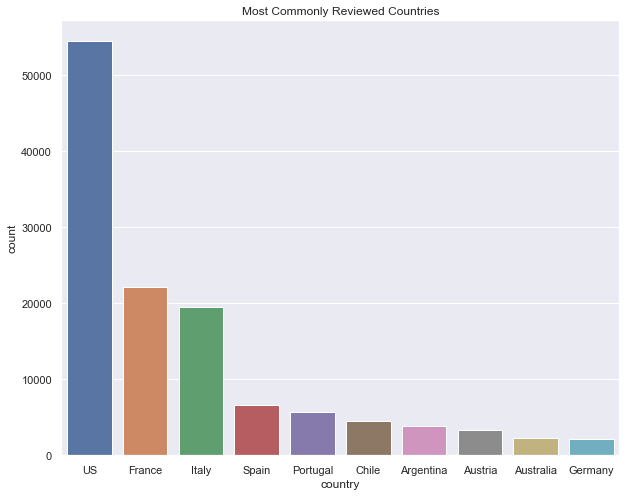

In [7]:
#most commonly reviewed countries
#Set size
sns.set(rc={'figure.figsize':(10,8)})
#Countplot of the top 10 countries
ax = sns.countplot(x="country", data=wine, order=wine["country"].value_counts().iloc[:10].index)
#add a title
ax.set_title('Most Commonly Reviewed Countries');

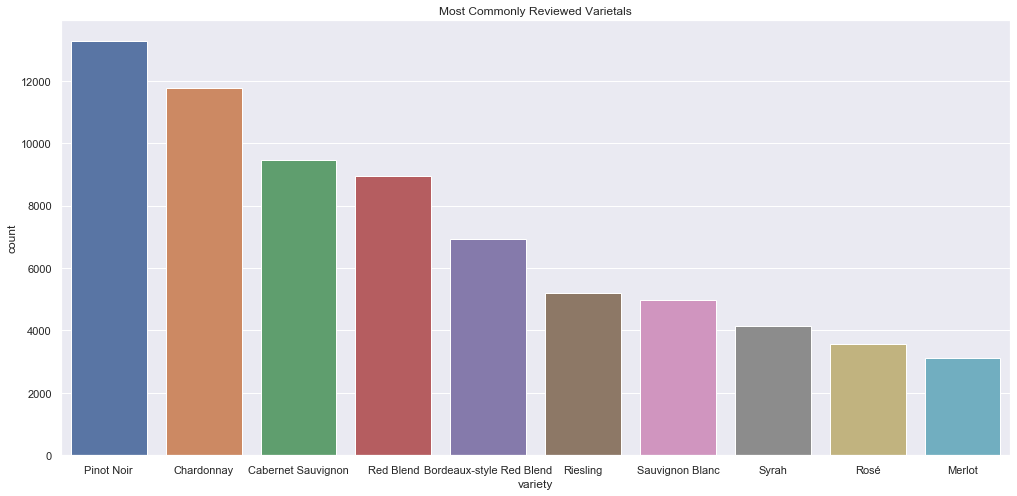

In [13]:
#most commonly reviewed varietals
sns.set(rc={'figure.figsize':(17,8)})
ax = sns.countplot(x="variety", data=wine, order=wine["variety"].value_counts().iloc[:10].index)
ax.set_title('Most Commonly Reviewed Varietals');

In [12]:
#Countplot of the countries with their varietals
#Create frequency table with total rows
grouped2 = pd.crosstab(index=wine["country"], columns=wine["variety"], margins=True)
#Sort the columns in a descending order so most reviewed varietals are at the beginning.
grouped2 = grouped2.sort_values("All", ascending=False, axis=1)
#Sort the rows so that the countries are listed in descending order.
grouped2 = grouped2.sort_values('All', ascending=False)
grouped2

variety,All,Pinot Noir,Chardonnay,Cabernet Sauvignon,Red Blend,Bordeaux-style Red Blend,Riesling,Sauvignon Blanc,Syrah,Rosé,...,Macabeo-Moscatel,Teroldego Rotaliano,Terrantez,Thrapsathiri,Sauvignon-Sémillon,Tinta Amarela,Sauvignon Musqué,Pignolo,Tinta Madeira,Grenache Gris
country,,,,,,,,,,,,,,,,,,,,,
All,129907,13269,11750,9470,8935,6915,5188,4963,4142,3563,...,1,1,1,1,1,1,1,1,1,1
US,54504,9885,6801,7315,2972,1824,1753,2163,3244,907,...,0,0,0,0,0,1,1,0,1,0
France,22093,1966,2808,57,304,4725,718,933,164,1923,...,0,0,0,0,1,0,0,0,0,1
Italy,19540,6,334,131,3624,2,24,49,147,73,...,0,1,0,0,0,0,0,1,0,0
Spain,6645,11,74,53,818,9,1,33,35,150,...,1,0,0,0,0,0,0,0,0,0
Portugal,5691,19,17,16,7,5,4,25,49,235,...,0,0,1,0,0,0,0,0,0,0
Chile,4471,363,516,771,409,37,24,683,273,44,...,0,0,0,0,0,0,0,0,0,0
Argentina,3800,105,295,540,234,89,2,78,57,38,...,0,0,0,0,0,0,0,0,0,0
Austria,3345,99,63,5,92,2,581,128,1,62,...,0,0,0,0,0,0,0,0,0,0


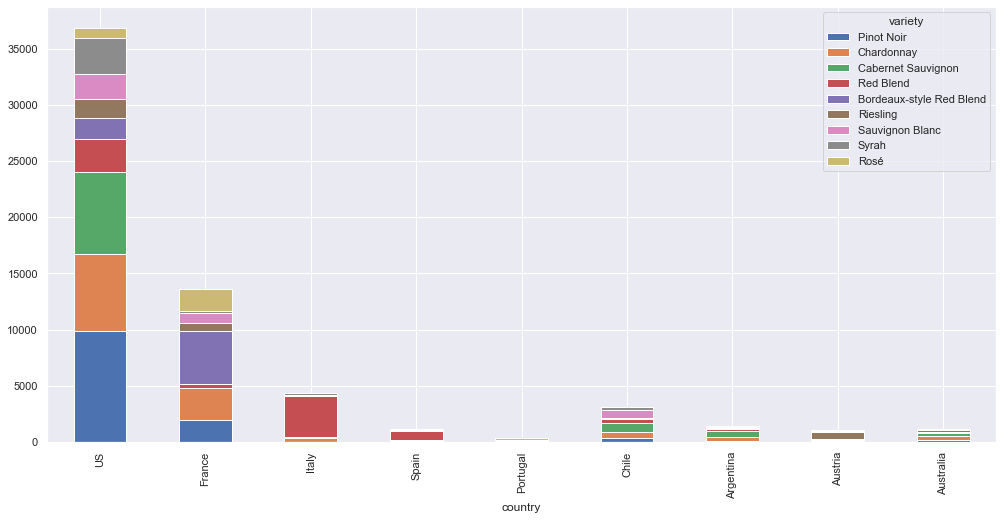

In [17]:
#the top 10 from both Variety and Country (Rows and Columns)
stacked_graph = grouped2.iloc[:10, :10]
#Drop our total row and column so they are not displayed in our graph
stacked_graph = stacked_graph.drop("All")
stacked_graph = stacked_graph.drop("All", axis=1)
#Show graph
stacked_graph.plot.bar(stacked=True);

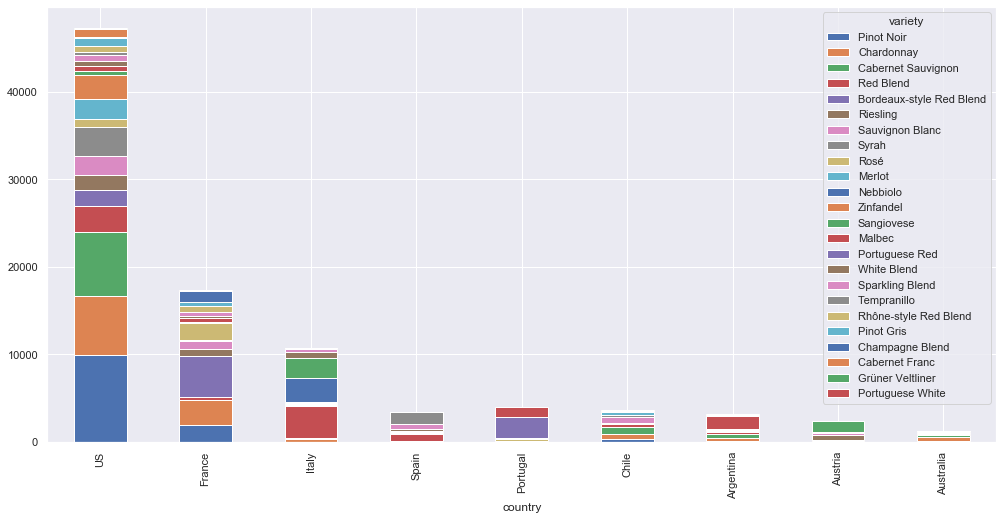

In [18]:
#the top 10 from both Variety and Country (Rows and Columns)
stacked_graph = grouped2.iloc[:10, :25]
#Drop our total row and column so they are not displayed in our graph
stacked_graph = stacked_graph.drop("All")
stacked_graph = stacked_graph.drop("All", axis=1)
#Show graph
stacked_graph.plot.bar(stacked=True);

# US, France, and Chile all seem to produce a lot of different varietals.